# Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

# Step 1: Reading and Understanding the Data

In [302]:
import numpy as np
import pandas as pd
# Supress Warnings

import warnings
warnings.filterwarnings('ignore') 

In [303]:
car = pd.read_csv("CarPrice_Assignment.csv")

In [304]:
# Check the head of the dataset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspecting the various important aspects of the given dataframe

In [305]:
car.shape

(205, 26)

In [306]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [307]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Cleaning and Preparation

In [308]:
 # we  need to consider only company name as the independent variable for model building. 

In [309]:
#Splitting company name from CarName column
CompanyName = car['CarName'].apply(lambda x : x.split(' ')[0])
car.insert(3, "CompanyName", CompanyName)
car.drop("CarName", axis = 1, inplace = True)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [310]:

car.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [311]:
# Correcting Invalid values(Spelling Errors)

car.CompanyName = car.CompanyName.str.lower()

def replace_name(a,b):
    car.CompanyName.replace(a, b, inplace = True)
    

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

car.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [312]:

#Checking for duplicates
car.loc[car.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [313]:
pd.set_option('display.max_columns',500)

In [314]:
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [315]:
car['CompanyName'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: CompanyName, dtype: int64

## we can see that Toyota is the top choice

# Visualising the Data

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualising the numeric variables

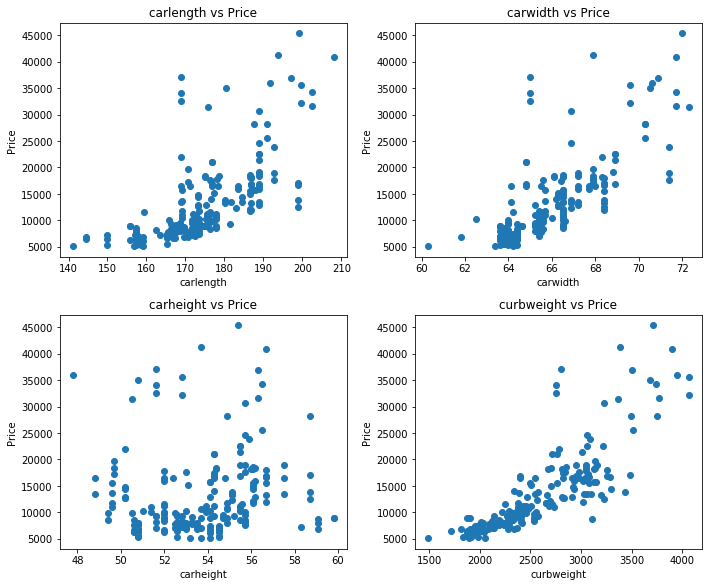

In [317]:
#Visualising Price vs variuos parameters

def scatter (x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(car[x],car['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)


plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()
    

In [318]:
#Deduction::

#carheight doesn't show any significant correlation with price.

#width, length and weight seems to have a poitive correlation with price as can be easily inferred by above.


In [319]:
np.corrcoef(car['carlength'], car['carwidth'])[0,1]

0.841118268481846

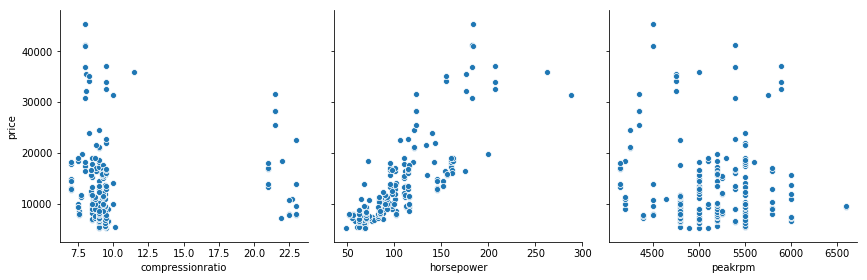

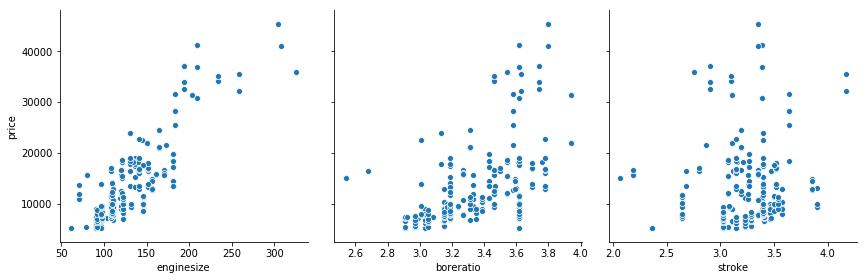

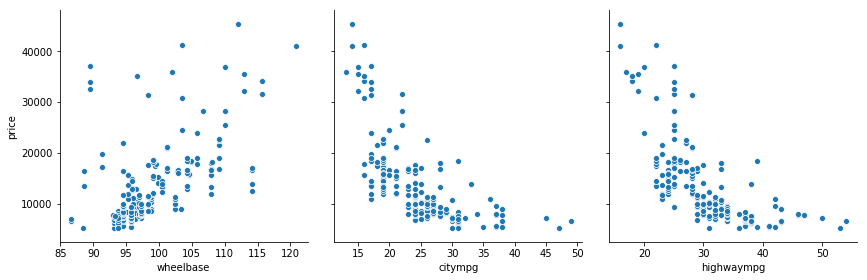

In [320]:
#visualising Price vs few more important variables

def pairplot(x,y,z):
    sns.pairplot(car, x_vars = [x,y,z], y_vars = ['price'], size = 4, aspect = 1, kind='scatter')
    plt.show()
    
pairplot('compressionratio', 'horsepower', 'peakrpm')
pairplot('enginesize', 'boreratio', 'stroke')
pairplot('wheelbase', 'citympg', 'highwaympg')

In [321]:
#Deductions:

#citympg, highwaympg have a negative correlation with price as can be easily inferred from above 
#however boreratio, enginesize, horsepower, wheelbase - seem to have a  positive correlation with price..

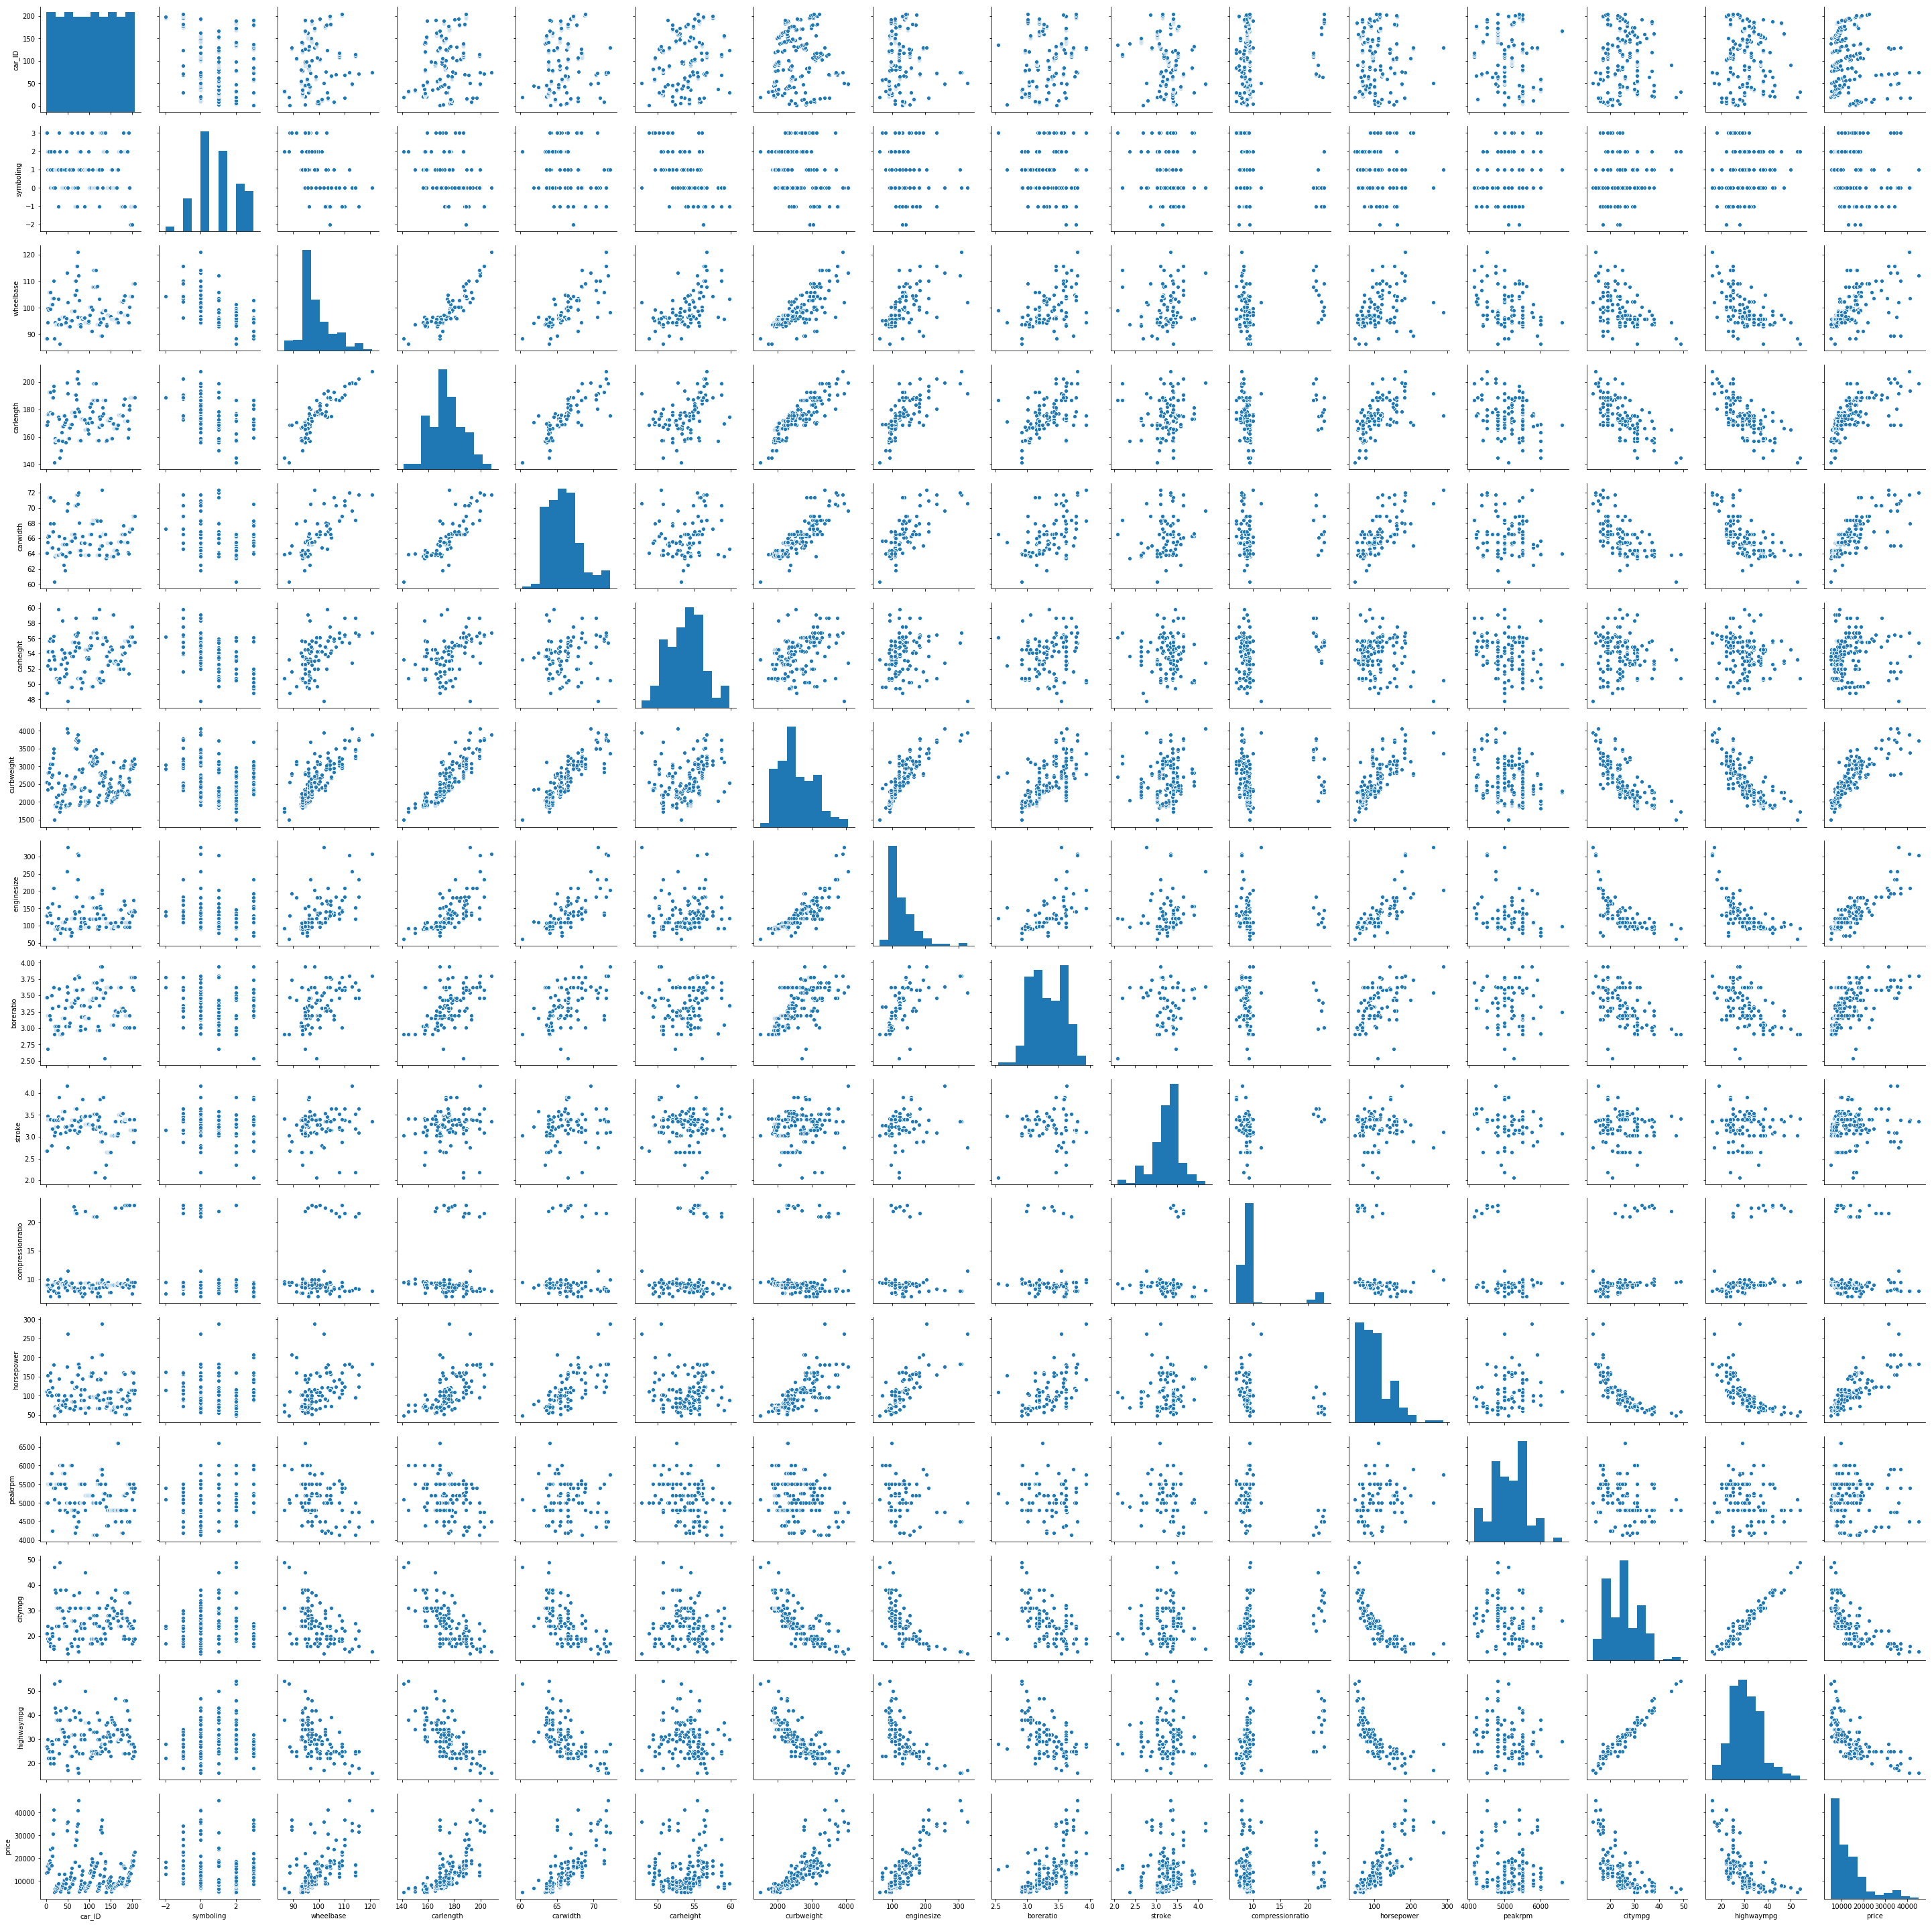

In [322]:
# visualising which numeric variables has good correlation with price  i.e which affects the price mostly.
sns.pairplot(car)
plt.show()

In [323]:
##width, length and weight seems to have a poitive correlation with price
#citympg, highwaympg have a negative correlation with price as can be easily inferred from above 
#however boreratio, enginesize, horsepower, wheelbase - seem to have a  positive correlation with price
#carheight doesn't show any significant correlation with price.


In [398]:
#Binning all the Car Companies based on average price of each Company.

car['price'] = car['price'].astype('int')
temp = car.copy()
car1 = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(car1.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
car_bin=['Budget','Medium','Luxurious']
car['Range'] = pd.cut(temp['price_y'],bins,right=False,labels=car_bin)
car.head()


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Range
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


#Visualising Categorical Data

In [399]:
# CompanyName
# Symboling
#fueltype
#enginetype
#carbody
#doornumber
#enginelocation
#fuelsystem
#cylindernumber
#aspiration
#drivewheel

[Text(0, 0.5, 'company freq'), Text(0.5, 0, 'Car company')]

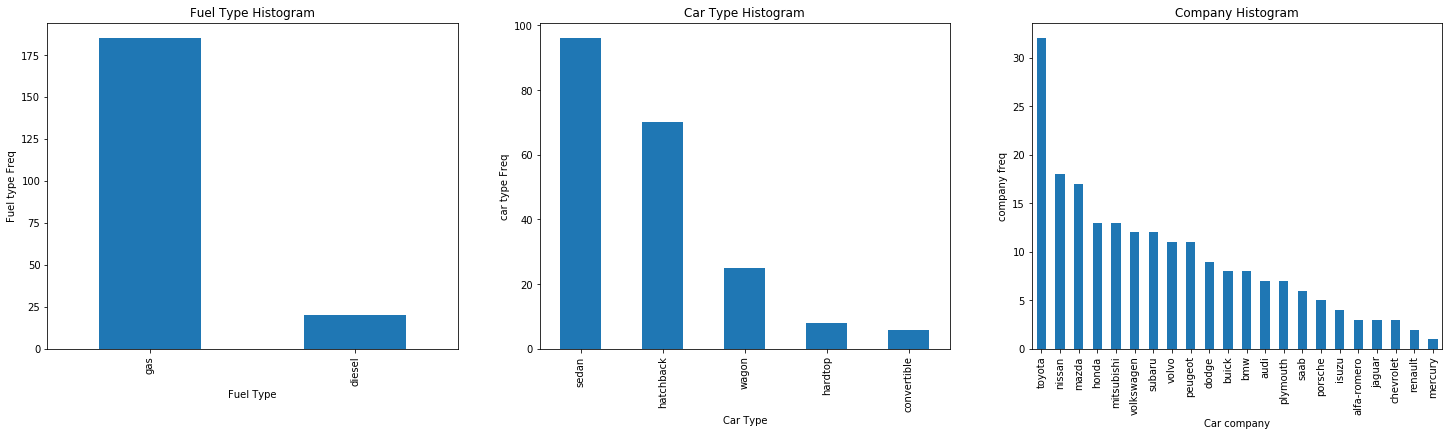

In [400]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = car.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Fuel type Freq')


plt.subplot(1,3,2)
plt1 = car.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='car type Freq')

plt.subplot(1,3,3)
plt1 = car.CompanyName.value_counts().plot('bar')
plt.title('Company Histogram')
plt1.set(xlabel = 'Car company', ylabel='company freq')

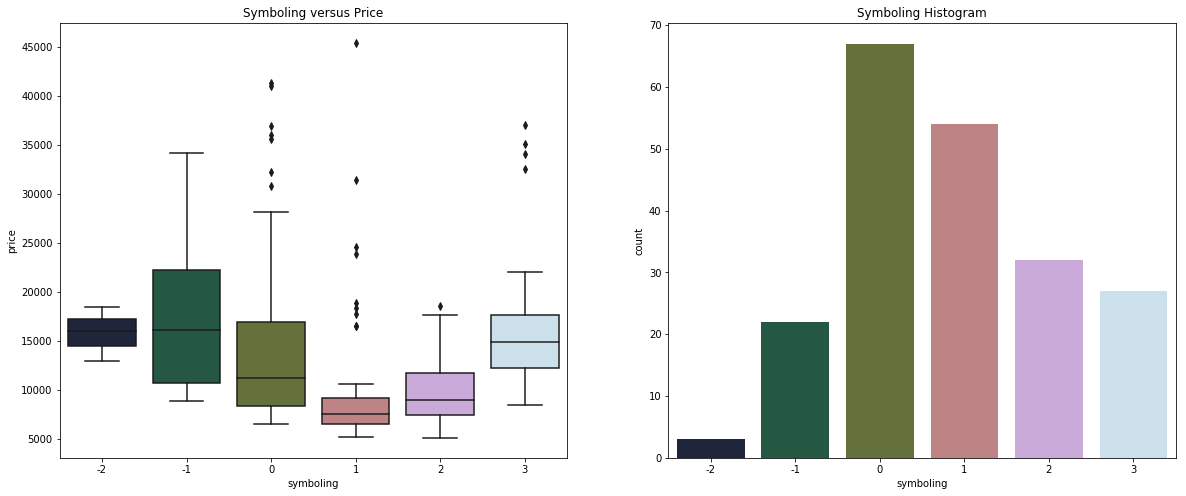

In [401]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Symboling versus Price')
sns.boxplot(x=car.symboling, y=car.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling Histogram')
sns.countplot(car.symboling, palette=("cubehelix"))

plt.show()

In [402]:
# Inferences::

#symboling 0 &1 has maximum frequency
# symboling -1,-2 has high price and thats justified since -1,-2 are good
# also 3 has same price range as -2
# There is a decrease at 1

<Figure size 1800x432 with 0 Axes>

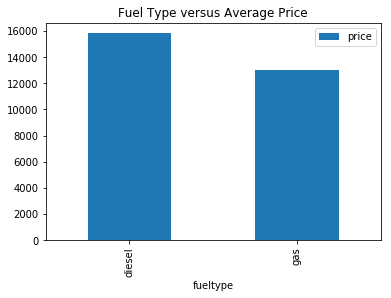

In [403]:
plt.figure(figsize=(25, 6))
df = pd.DataFrame(car.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type versus Average Price')
plt.show()

In [404]:
#Deduction:
# Diesel fueled has higher price than Gas fueled

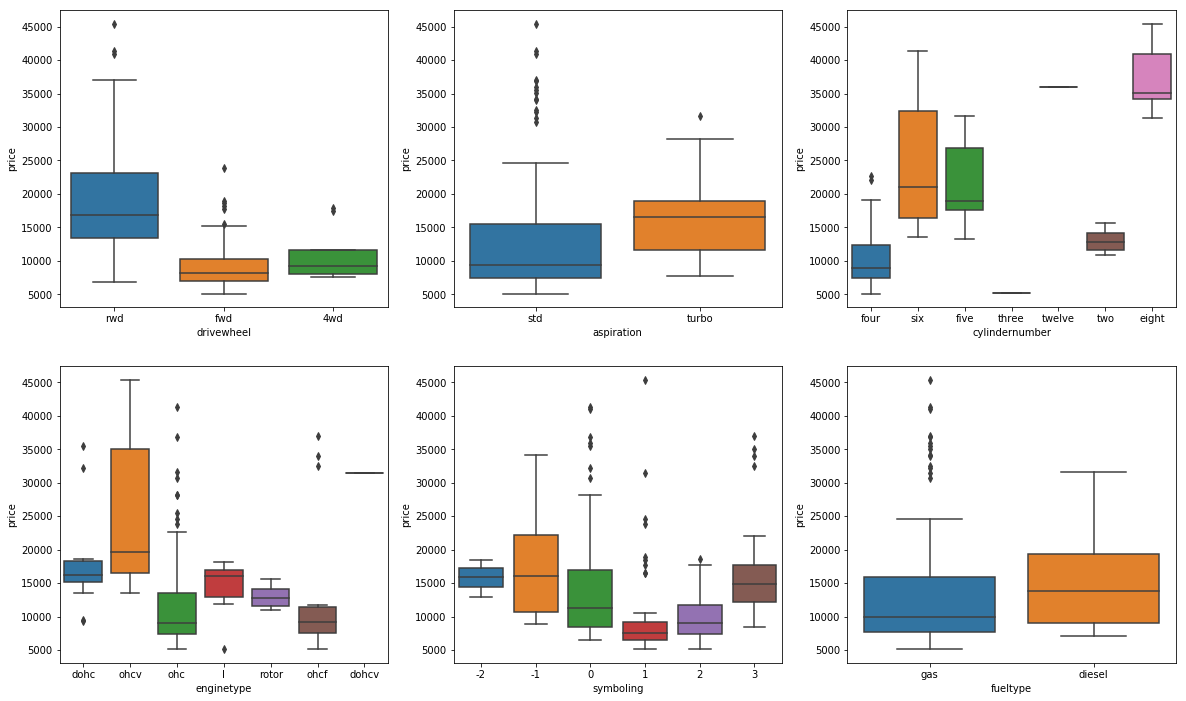

In [405]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(2,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(2,3,4)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(2,3,5)
sns.boxplot(x = 'symboling', y = 'price', data = car)
plt.subplot(2,3,6)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.show()

In [406]:
# Deductions::
#rwd has higher price than fwd and 4wd
#aspiration turbo has higher price than std
# 8-cylinder has highest price and 4-cylinder lowest
# -1 & -2 synboling has higher prices that means auto is pretty safe and thats justified.
# Engine type Ohcv has higher range then comes dohc and then i 

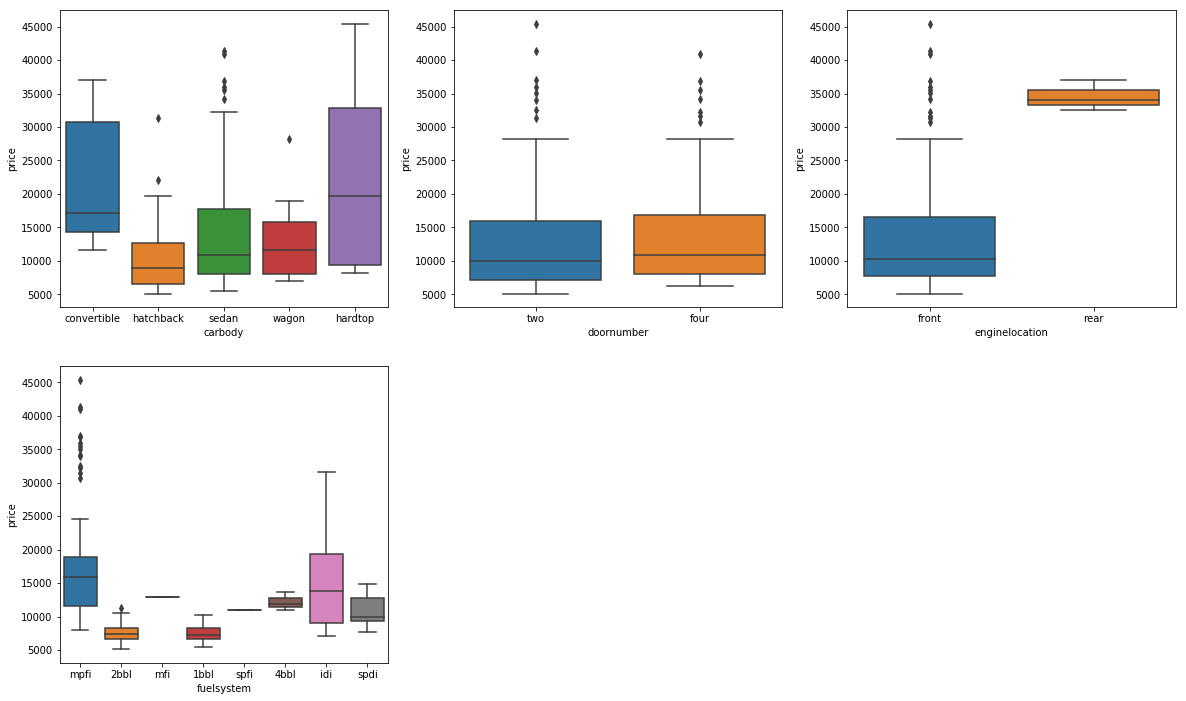

In [407]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(2,3,2)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(2,3,3)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(2,3,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)


In [408]:
# Deductions::
#hardtop has highest price range followed by convertible
# 4-door has slightly has price than 2-doors
# rear engine location has pretty higher price range as compared to front engine location
# mpfi and idi fuel system has higher price range than others

<Figure size 1800x432 with 0 Axes>

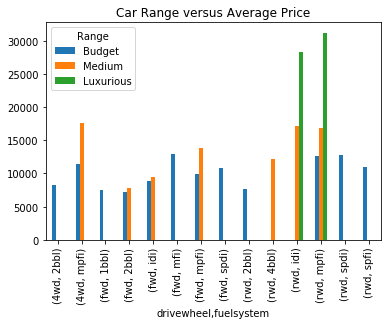

In [409]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(car.groupby(['drivewheel','fuelsystem','Range'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range versus Average Price')
plt.show()

#High price ranged cars has rwd drivewheel with idi or mpfi fuelsystem.

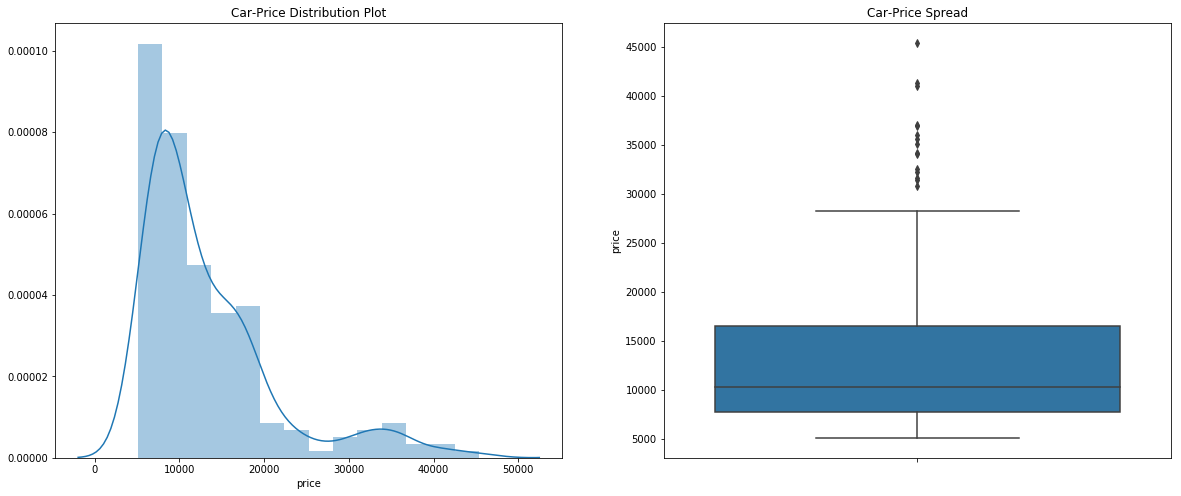

In [410]:
# see  General spread of car-price 

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car-Price Distribution Plot')
sns.distplot(car.price)

plt.subplot(1,2,2)
plt.title('Car-Price Spread')
sns.boxplot(y=car.price)

plt.show()

In [411]:
print(car.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.702439
std       7988.848977
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


##important and significant vaiables after visualisation##

In [412]:
#Range,wheel base,Fuel type,Boreratio,Aspiration,Cylinder Number,Drivewheel,
#Curbweight,Car width, Car length, Engine Size, carbody, Horse Power,Engine type 


In [413]:
cars_regression = car[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth', 'Range']]
cars_regression.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,Range
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4,Medium


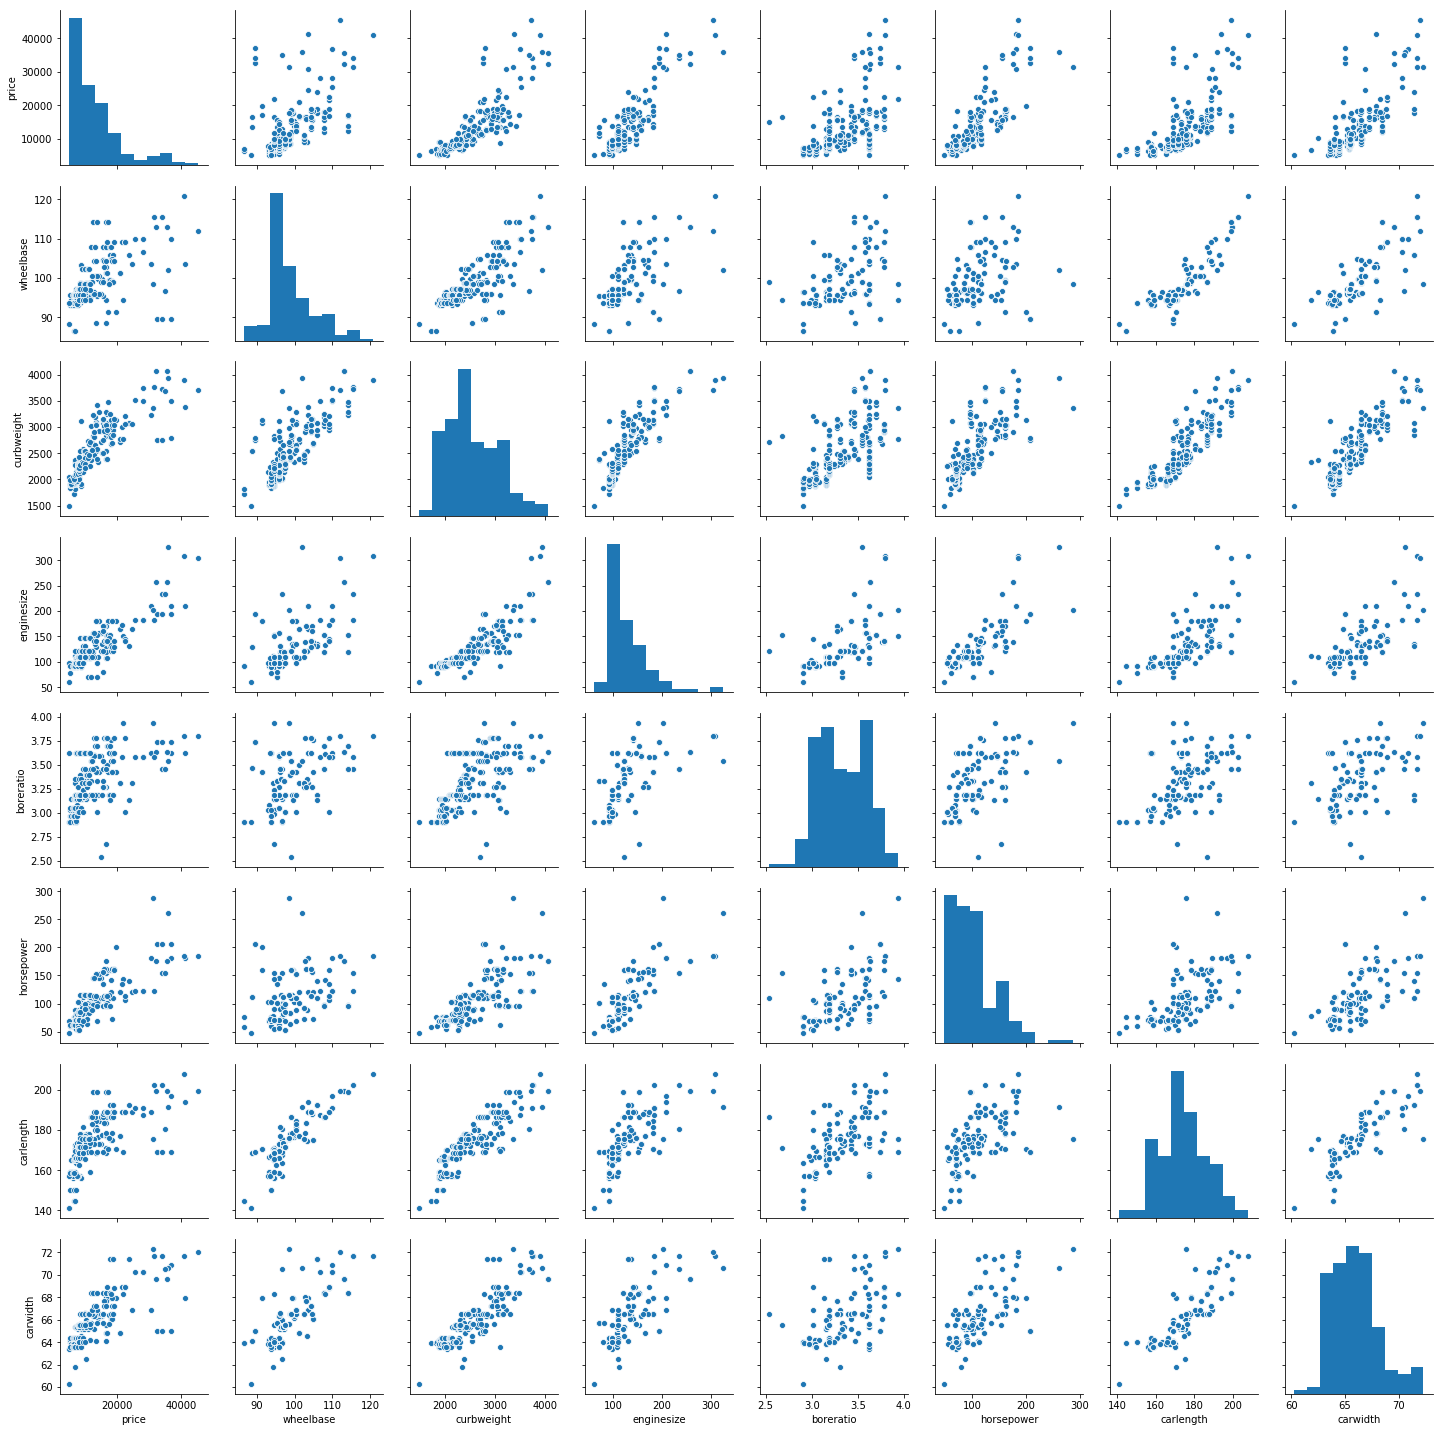

In [414]:
sns.pairplot(cars_regression)
plt.show()

# Data Preparation

In [415]:


# Defining the map function for Dummy variables

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the car_Regression

cars_regression = dummies('Range',cars_regression)
cars_regression= dummies('carbody',cars_regression)
cars_regression = dummies('aspiration',cars_regression)
cars_regression = dummies('enginetype',cars_regression)
cars_regression = dummies('drivewheel',cars_regression)
cars_regression = dummies('cylindernumber',cars_regression)
cars_regression = dummies('fueltype',cars_regression)



In [416]:
cars_regression.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,Medium,Luxurious,hardtop,hatchback,sedan,wagon,turbo,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,five,four,six,three,twelve,two,gas
0,13495,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1,16500,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,16500,94.5,2823,152,2.68,154,171.2,65.5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,13950,99.8,2337,109,3.19,102,176.6,66.2,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,17450,99.4,2824,136,3.19,115,176.6,66.4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [417]:
cars_regression.shape

(205, 30)

# Splitting the Data into Training and Testing Sets

In [418]:
from sklearn.model_selection import train_test_split

#We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(cars_regression, train_size = 0.7, test_size = 0.3, random_state = 100)

In [419]:
df_train.shape

(143, 30)

In [420]:
df_test.shape

(62, 30)

# Feature scaling

In [421]:
from sklearn.preprocessing import MinMaxScaler

In [422]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'enginesize', 'curbweight', 'horsepower', 'boreratio','carwidth','carlength','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [423]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,Medium,Luxurious,hardtop,hatchback,sedan,wagon,turbo,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,five,four,six,three,twelve,two,gas
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [424]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,Medium,Luxurious,hardtop,hatchback,sedan,wagon,turbo,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,five,four,six,three,twelve,two,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.412587,0.118881,0.020979,0.342657,0.475524,0.132867,0.181818,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.594406,0.349650,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.909091
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.494030,0.324786,0.143818,0.476266,0.501156,0.340624,0.387050,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.492733,0.478536,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


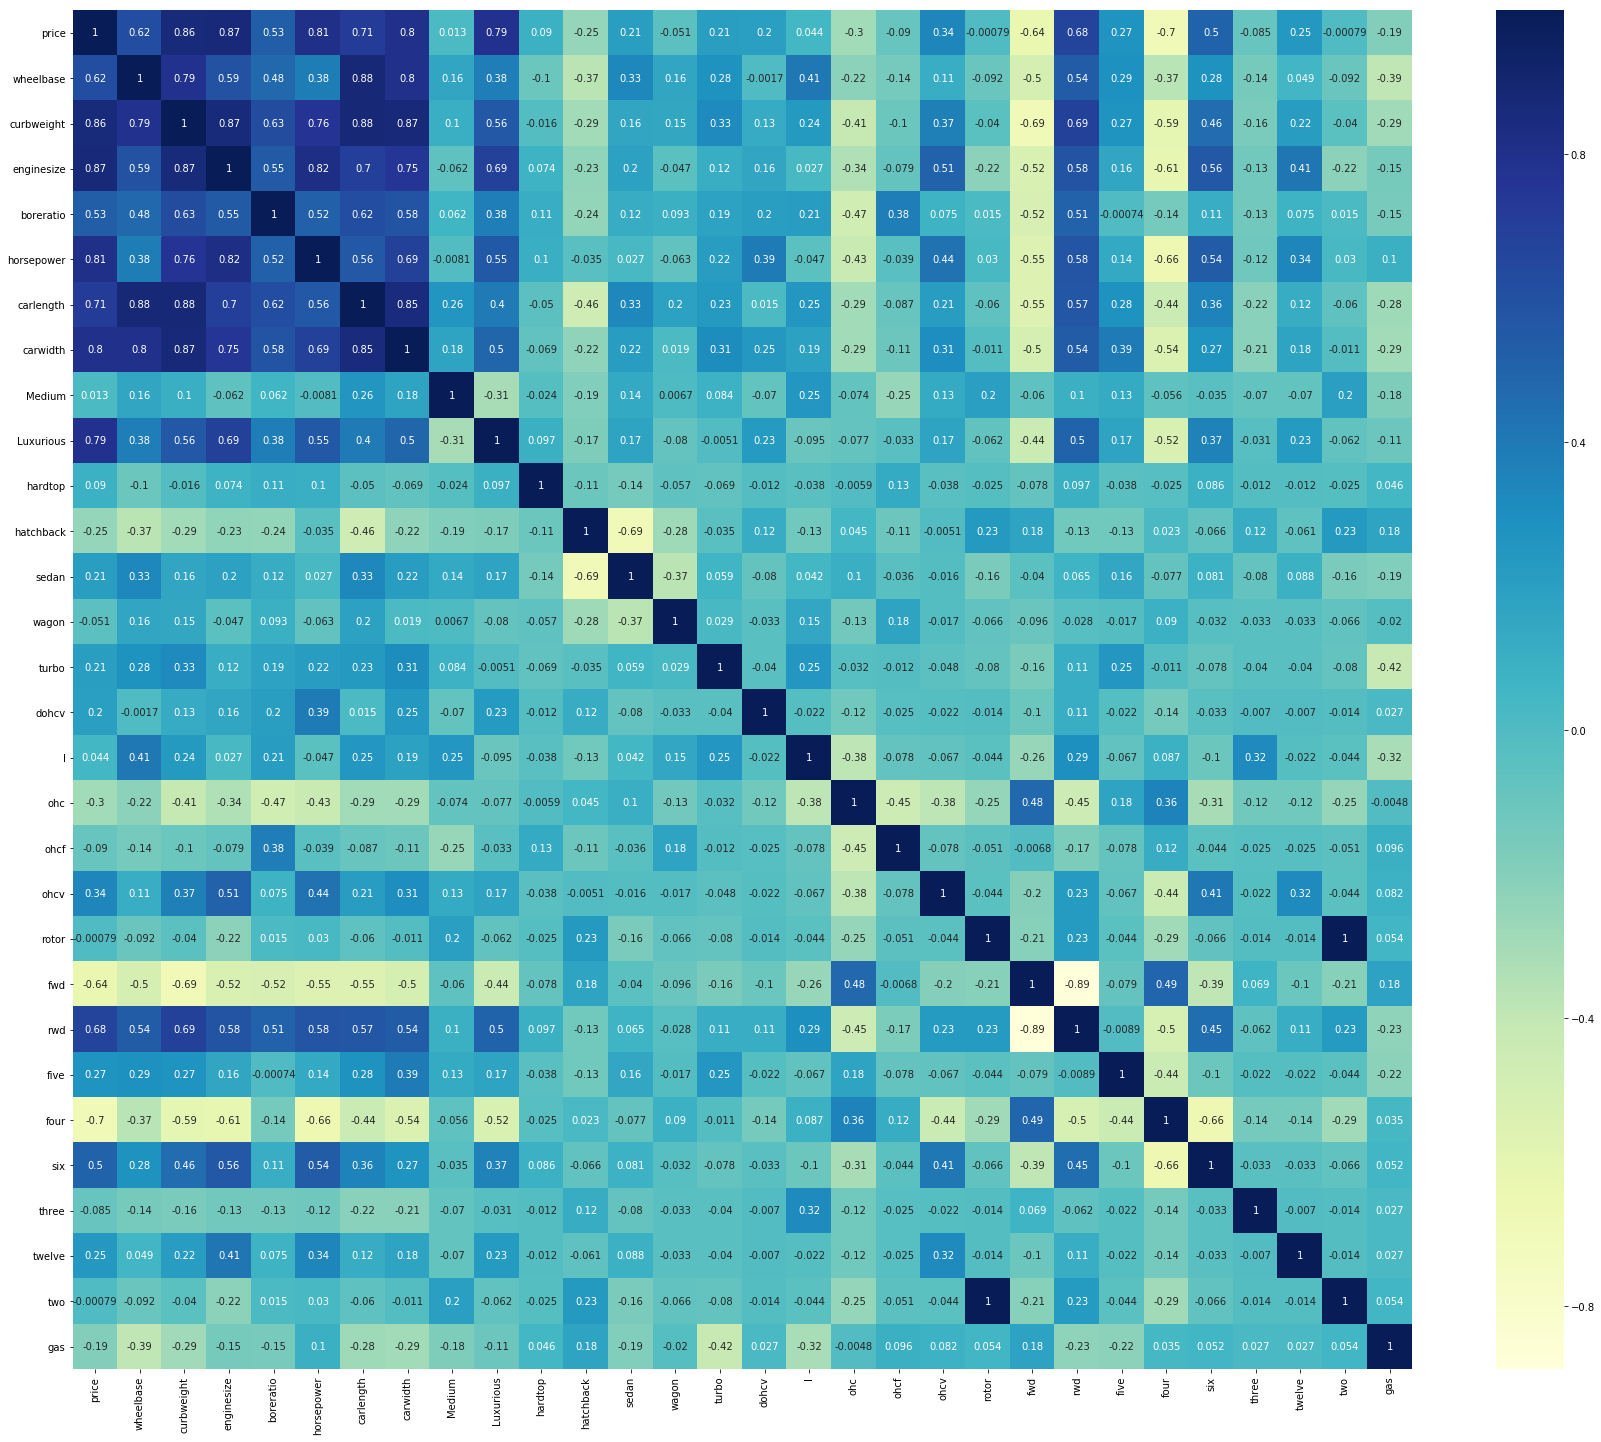

In [425]:
#Plotting Heatmap to see the Correlation
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Highly correlated variables to price are - highend , enginesize, horsepower,carwidth and curbweight.

In [426]:
# dividing dataframe into x and y variables:

y_train = df_train.pop('price')


In [427]:
x_train = df_train

In [428]:
y_train.shape

(143,)

In [429]:
x_train.shape

(143, 29)

# Bulding the Model

In [430]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [431]:
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(x_train, y_train)

In [432]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 2),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 11),
 ('horsepower', True, 1),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('Medium', False, 14),
 ('Luxurious', True, 1),
 ('hardtop', False, 3),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 17),
 ('dohcv', True, 1),
 ('l', False, 20),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 12),
 ('rotor', False, 19),
 ('fwd', False, 18),
 ('rwd', False, 15),
 ('five', False, 6),
 ('four', False, 5),
 ('six', False, 10),
 ('three', True, 1),
 ('twelve', False, 9),
 ('two', False, 16),
 ('gas', False, 4)]

In [433]:
x_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'carwidth', 'Luxurious',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'three'],
      dtype='object')

In [434]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,curbweight,enginesize,horsepower,carwidth,Luxurious,hatchback,sedan,wagon,dohcv,three
122,0.272692,0.139623,0.083333,0.291667,0,0,1,0,0,0
125,0.500388,0.339623,0.395833,0.666667,1,1,0,0,0,0
166,0.314973,0.139623,0.266667,0.308333,0,1,0,0,0,0
1,0.411171,0.260377,0.262500,0.316667,0,0,0,0,0,0
199,0.647401,0.260377,0.475000,0.575000,0,0,0,1,0,0


In [435]:
## Invoking Functions to Build Model and  to Check VIF

def build_model(X,y):
    X = sm.add_constant(X) #to add constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [436]:
x_train_new = build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.63e-71
Time:                        19:21:13   Log-Likelihood:                 206.41
No. Observations:                 143   AIC:                            -390.8
Df Residuals:                     132   BIC:                            -358.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0312      0.026     -1.192      0.2

In [437]:
#Calculating the Variance Inflation Factor
checkVIF(x_train_new)

,Features,VIF
0,const,27.71
1,curbweight,9.96
2,enginesize,7.33
7,sedan,6.10
6,hatchback,5.74
4,carwidth,5.27
3,horsepower,4.52
8,wagon,3.70
5,Luxurious,2.01
9,dohcv,1.51


In [438]:
# dropping curbweight to to high VIF value (it has high multicolinearity)
x_train_new = x_train_new.drop(["curbweight"], axis = 1)

Model 1

In [439]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     172.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.62e-69
Time:                        19:21:19   Log-Likelihood:                 198.57
No. Observations:                 143   AIC:                            -377.1
Df Residuals:                     133   BIC:                            -347.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0392      0.027     -1.428      0.1

In [440]:
checkVIF(x_train_new)

,Features,VIF
0,const,27.54
6,sedan,6.10
1,enginesize,5.99
5,hatchback,5.71
2,horsepower,4.22
7,wagon,3.51
3,carwidth,2.76
4,Luxurious,2.01
8,dohcv,1.39
9,three,1.06


we can see VIF has been decreased for most of the variables automatically


In [441]:
#dropping engine size due to its high p-value
x_train_new = x_train_new.drop(["enginesize"], axis = 1)

Model 2

In [442]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.71e-70
Time:                        19:21:28   Log-Likelihood:                 198.48
No. Observations:                 143   AIC:                            -379.0
Df Residuals:                     134   BIC:                            -352.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0379      0.027     -1.395      0.1

In [443]:
checkVIF(x_train_new)

,Features,VIF
0,const,27.15
5,sedan,6.06
4,hatchback,5.56
6,wagon,3.47
1,horsepower,2.50
2,carwidth,2.29
3,Luxurious,1.57
7,dohcv,1.21
8,three,1.06


In [444]:
# dropping sedan becasue of its high VIF value
x_train_new = x_train_new.drop(["sedan"], axis = 1)

Model 3

In [445]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.00e-69
Time:                        19:21:30   Log-Likelihood:                 193.80
No. Observations:                 143   AIC:                            -371.6
Df Residuals:                     135   BIC:                            -347.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1006      0.018     -5.591      0.0

In [446]:
checkVIF(x_train_new)

,Features,VIF
0,const,11.22
1,horsepower,2.39
2,carwidth,2.15
3,Luxurious,1.57
4,hatchback,1.24
6,dohcv,1.21
5,wagon,1.11
7,three,1.06


In [447]:
# dropping wagon due to high p-value as it becomes insignificant then.


In [448]:
x_train_new = x_train_new.drop(["wagon"], axis = 1)

Model 4

In [449]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     244.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.09e-70
Time:                        19:21:34   Log-Likelihood:                 193.25
No. Observations:                 143   AIC:                            -372.5
Df Residuals:                     136   BIC:                            -351.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1042      0.018     -5.903      0.0

In [450]:
checkVIF(x_train_new)

,Features,VIF
0,const,10.80
1,horsepower,2.39
2,carwidth,2.15
3,Luxurious,1.54
5,dohcv,1.21
4,hatchback,1.13
6,three,1.06


In [451]:
# dropping dohcv and check stats

In [452]:
x_train_new = x_train_new.drop(["dohcv"], axis = 1)

Model 4

In [453]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     251.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.46e-67
Time:                        19:21:36   Log-Likelihood:                 182.87
No. Observations:                 143   AIC:                            -353.7
Df Residuals:                     137   BIC:                            -336.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0891      0.019     -4.796      0.0

In [454]:
#removing three because of high p-value

x_train_new = x_train_new.drop(["three"], axis = 1)

Model 5

In [455]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.04e-67
Time:                        19:21:37   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [456]:
checkVIF(x_train_new)

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
3,Luxurious,1.53
4,hatchback,1.10


# Residual Analysis

In [457]:

lm = sm.OLS(y_train,x_train_new).fit()
y_train_price = lm.predict(x_train_new)

Text(0.5, 0, 'Errors')

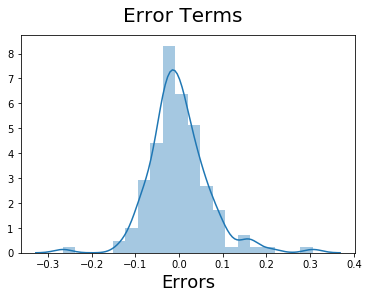

In [458]:
# Plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)



# As we can see Error terms are approximately normally distributed so our assumptions are satisfied.

# Prediction and Evaluation

#Applying the scaling on the test sets

In [459]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [460]:
df_test.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,Medium,Luxurious,hardtop,hatchback,sedan,wagon,turbo,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,five,four,six,three,twelve,two,gas
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000
mean,0.209644,0.370121,0.371743,0.228835,0.667691,0.359521,0.486741,0.375212,0.435484,0.112903,0.080645,0.338710,0.451613,0.096774,0.177419,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.564516,0.419355,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.887097
std,0.210911,0.179970,0.222354,0.188416,0.228484,0.252970,0.183964,0.208977,0.499868,0.319058,0.274512,0.477134,0.501716,0.298064,0.385142,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.499868,0.497482,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.319058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.076536,0.265306,0.219125,0.126638,0.515873,0.140323,0.389764,0.221053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000
50%,0.136847,0.327988,0.344065,0.183406,0.674603,0.312903,0.475591,0.326316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000
75%,0.280049,0.482507,0.540726,0.287118,0.857143,0.432258,0.642126,0.421053,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


In [461]:
#Dividing into X and y

In [462]:
y_test = df_test.pop('price')


In [463]:
x_test = df_test

In [464]:
# # Now let's use our model to make predictions.

x_train_new = x_train_new.drop('const',axis=1)



In [465]:
# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train_new.columns]

In [466]:
# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

# Making Predictions

In [467]:
y_pred = lm.predict(x_test_new)

In [468]:
from sklearn.metrics import r2_score

In [469]:
r2_score(y_test, y_pred)


0.8614595209022032

# we can see there is almost 4 % difference between R-Square of Test and Train Set which means our Model is performing well.

# Model Evaluation

Text(0, 0.5, 'y_pred')

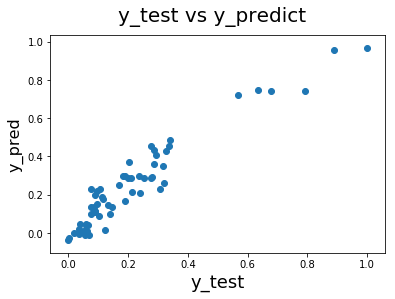

In [470]:
#Let's now plot the graph for actual versus predicted values.



# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_predict', fontsize=20)              # Plotting heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   


In [471]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.04e-67
Time:                        19:21:51   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

# Useful Deductions

p-values - p-values for all the coefficients are less than the significance level of 0.05. - that means all the predictors 
are statistically significant.
 
R-sqaured and Adjusted R-squared (extent of fit) - 0.899 and 0.896 - 90% variance explained.
 
F-stats and Prob(F-stats) (overall model fit) - 308 and 1.04e-67(approx. 0.0) - Model fir is significant and explained 90% variance is noy just by chance.


# Equation of best fit line::

We can see that the equation of our best fitted line is:

price = .395 x carwidth + .279 x Luxurious + .44 x horsepower -.0414 x hatchback - .0824